In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [36]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pickle

In [5]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [6]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

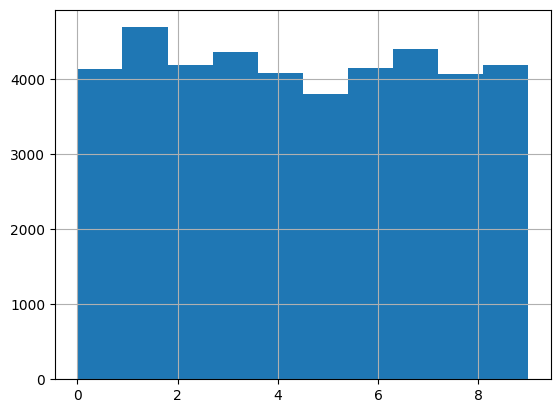

In [7]:
df['label'].hist()

In [8]:
X = df.drop('label',axis=1)
y = df['label']
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [9]:
pca = PCA(n_components = 320)
 
X = pca.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [24]:
y_train

34941    6
24433    5
24432    3
8832     4
30291    7
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 33600, dtype: int64

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming y_train is your corresponding target labels
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=42)

for train_index, test_index in stratified_split.split(X_train, y_train):
    X_train_subset = X_train[train_index]
    y_train_subset = y_train.iloc[train_index]


In [32]:
X_train_subset.shape

(6720, 320)

**Logistic Regression**

In [ ]:
logr = linear_model.LogisticRegression(solver='liblinear',C=2)
logr.fit(X_train,y_train)

Test accuracy

In [ ]:
y_pred = logr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Train accuracy

In [ ]:
y_pred = logr.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,cmap="Blues",annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("\nClassification Report:\n", classification_report(y_train, y_pred))

**SVM**

In [38]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [39]:
def calculate_best_params(grid):
    svm  = SVC()
    svm_cv = GridSearchCV(svm, grid, cv = 3)

    svm_cv.fit(X_train_subset,y_train_subset)
    print("Best Parameters:",svm_cv.best_params_)
    print("Train Score:",svm_cv.best_score_)
    print("Test Score:",svm_cv.score(X_test,y_test))

In [44]:
param_grid = {
    'C': [0.01,0.1,1,10],
    'gamma': [0.01,0.1,1,10],
    'kernel': ['poly']
}
calculate_best_params(param_grid)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py", line 270, in fit
    raise ValueError(
ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/opt/conda/li

Best Parameters: {'C': 0.01, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
Train Score: 0.9023809523809524
Test Score: 0.9033333333333333


In [46]:
model = svm.SVC(C=0.1,gamma=0.1,kernel='poly')

In [47]:
X_train.shape

(33600, 320)

In [51]:
model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1, kernel='poly')

Test accuracy

In [55]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


In [60]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.15%


train accuracy

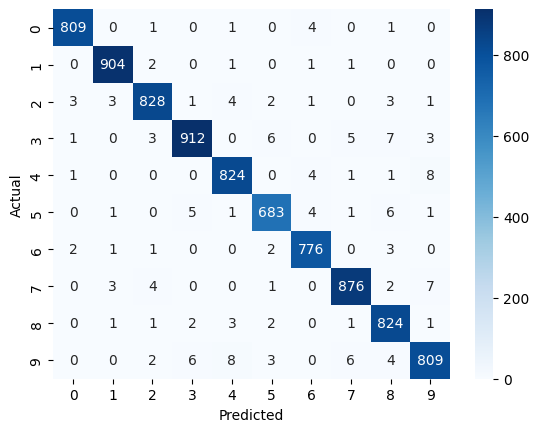

In [61]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,cmap="Blues",annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [62]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      0.99      0.99       909
           2       0.98      0.98      0.98       846
           3       0.98      0.97      0.98       937
           4       0.98      0.98      0.98       839
           5       0.98      0.97      0.98       702
           6       0.98      0.99      0.99       785
           7       0.98      0.98      0.98       893
           8       0.97      0.99      0.98       835
           9       0.97      0.97      0.97       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



**KNN**

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
def calculate_best_params(grid):
    knn = KNeighborsClassifier()
    knn_cv = GridSearchCV(knn, grid, cv = 3)

    knn_cv.fit(X_train_subset,y_train_subset)
    print("Best Parameters:",knn_cv.best_params_)
    print("Train Score:",knn_cv.best_score_)
    print("Test Score:",knn_cv.score(X_test,y_test))

In [93]:
param_grid = {
    'n_neighbors' : [6,7,8,9],
    'p' : [1,2,3,4,5]
}
calculate_best_params(param_grid)

SyntaxError: invalid syntax (3349669706.py, line 4)

In [92]:
knn = KNeighborsClassifier(n_neighbors=6,p=4) 
  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, p=4)

Train accuracy

In [ ]:
y_pred = knn.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy

In [88]:
y_pred = knn.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 96.31%


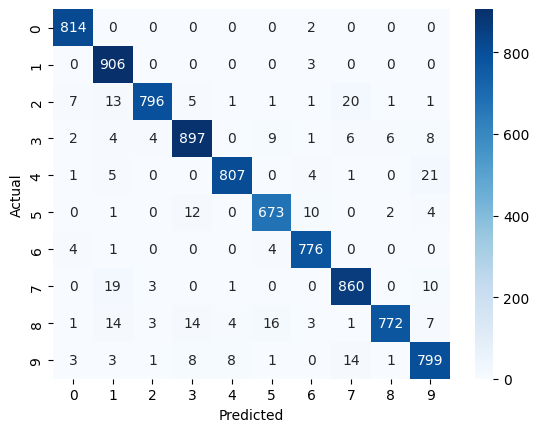

In [70]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,cmap="Blues",annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [71]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.94      1.00      0.97       909
           2       0.99      0.94      0.96       846
           3       0.96      0.96      0.96       937
           4       0.98      0.96      0.97       839
           5       0.96      0.96      0.96       702
           6       0.97      0.99      0.98       785
           7       0.95      0.96      0.96       893
           8       0.99      0.92      0.95       835
           9       0.94      0.95      0.95       838

    accuracy                           0.96      8400
   macro avg       0.97      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



****CNN****

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

In [ ]:
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(256,activation="sigmoid"),
    Dense(128,activation="sigmoid"),
    Dense(10,activation="sigmoid"),
])


In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=2000)

In [ ]:
predi = model.predict(X)

In [ ]:
print(classification_report(y,np.argmax(predi,axis=1)))

In [ ]:
print(predi)

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# Print the test accuracy
print(f'Test accuracy on the dataset: {test_acc}')
    

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_train, y_train, verbose=2)

# Print the test accuracy
print(f'Test accuracy on the dataset: {test_acc}')